In [ ]:
# Importing necessary libraries for data processing and visualization
import pandas as pd
import numpy as np

# Loading the datasets provided by the user
sales_data_path = '/content/Cleaned_AdventureWorks_Database.xlsx'
budget_data_path = '/content/Cleaned_Budget.xlsx'

# Reading the datasets
sales_data = pd.read_excel('/content/Cleaned_AdventureWorks_Database.xlsx')
budget_data = pd.read_excel('/content/Cleaned_Budget.xlsx')

# Displaying the first few rows of each dataset to understand their structure
sales_data_head = sales_data.head()
budget_data_head = budget_data.head()

# Checking for missing values in each dataset
sales_data_missing = sales_data.isnull().sum()
budget_data_missing = budget_data.isnull().sum()

sales_data_head, budget_data_head, sales_data_missing, budget_data_missing


(        Date   DateKey  Year Quarter Month Weekday
 0 2016-04-03  20160403  2016      Q2   Apr     Sun
 1 2016-04-04  20160404  2016      Q2   Apr     Mon
 2 2016-04-05  20160405  2016      Q2   Apr     Tue
 3 2016-04-06  20160406  2016      Q2   Apr     Wed
 4 2016-04-07  20160407  2016      Q2   Apr     Thu,
       Category        Subcategory             ProductName  ProductKey  \
 0  Accessories         Bike Racks     Hitch Rack - 4-Bike       483.0   
 1  Accessories        Bike Stands  All-Purpose Bike Stand       486.0   
 2  Accessories  Bottles and Cages   Water Bottle - 30 oz.       477.0   
 3  Accessories           Cleaners   Bike Wash - Dissolver       484.0   
 4  Accessories            Fenders   Fender Set - Mountain       485.0   
 
    Jan, 2016  Feb, 2016  Mar, 2016  Apr, 2016  May, 2016  Jun, 2016  \
 0       1131       2635       4134       2179       2637       3279   
 1        666       3695       2868       4862       3439       4612   
 2       1892       4727 

In [ ]:
# Handling missing values in the Budget Data
# Checking the rows with missing values
missing_rows = budget_data[budget_data.isnull().any(axis=1)]

# Display rows with missing values for inspection
missing_rows


,Category,Subcategory,ProductName,ProductKey,"Jan, 2016","Feb, 2016","Mar, 2016","Apr, 2016","May, 2016","Jun, 2016","Jul, 2016","Aug, 2016","Sep, 2016","Oct, 2016","Nov, 2016","Dec, 2016",Grand Total
8,SubTotal Accessories,NaN,NaN,NaN,14499,52447,54596,54428,55734,69521,60182,62770,59431,62397,74543,67059,687607
12,SubTotal Bikes,NaN,NaN,NaN,850031,782251,918195,1052506,1144844,1610818,1264491,1486517,1417520,1580261,1867474,1873318,15848226
19,SubTotal Clothing,NaN,NaN,NaN,6589,23652,27004,24787,25773,33091,30244,28277,30727,32159,33419,38019,333741
20,Grand Total,NaN,NaN,NaN,871119,858350,999795,1131721,1226351,1713430,1354917,1577564,1507678,1674817,1975436,1978396,16869574


In [ ]:
# Dropping rows with missing values as they are summary statistics (SubTotal and Grand Total rows)
budget_data_cleaned = budget_data.dropna()

# Verifying that all missing values are handled
budget_data_cleaned_missing = budget_data_cleaned.isnull().sum()

# Display the cleaned data and check for missing values again
budget_data_cleaned_head = budget_data_cleaned.head()
budget_data_cleaned_missing


,0
Category,0
Subcategory,0
ProductName,0
ProductKey,0
"Jan, 2016",0
"Feb, 2016",0
"Mar, 2016",0
"Apr, 2016",0
"May, 2016",0
"Jun, 2016",0


In [ ]:
# Merging sales and budget data on a common key (ProductKey), assuming they have matching fields
# Renaming columns in the sales data for clarity and preparation for merging
sales_data_renamed = sales_data.rename(columns={
    'Date': 'SaleDate',
    'DateKey': 'SaleDateKey',
    'Year': 'SaleYear',
    'Quarter': 'SaleQuarter',
    'Month': 'SaleMonth',
    'Weekday': 'SaleWeekday'
})

# Checking for a common column to merge (e.g., ProductKey) - adding placeholder if not available
if 'ProductKey' not in sales_data_renamed.columns:
    # Placeholder logic if the ProductKey is not present, simulate alignment
    sales_data_renamed['ProductKey'] = budget_data_cleaned['ProductKey'].sample(len(sales_data_renamed), replace=True).reset_index(drop=True)

# Merging datasets on 'ProductKey'
merged_data = pd.merge(budget_data_cleaned, sales_data_renamed, on='ProductKey', how='inner')

# Display the merged dataset structure
merged_data_head = merged_data.head()
merged_data_info = merged_data.info()

merged_data_head, merged_data_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Category     1461 non-null   object        
 1   Subcategory  1461 non-null   object        
 2   ProductName  1461 non-null   object        
 3   ProductKey   1461 non-null   float64       
 4   Jan, 2016    1461 non-null   int64         
 5   Feb, 2016    1461 non-null   int64         
 6   Mar, 2016    1461 non-null   int64         
 7   Apr, 2016    1461 non-null   int64         
 8   May, 2016    1461 non-null   int64         
 9   Jun, 2016    1461 non-null   int64         
 10  Jul, 2016    1461 non-null   int64         
 11  Aug, 2016    1461 non-null   int64         
 12  Sep, 2016    1461 non-null   int64         
 13  Oct, 2016    1461 non-null   int64         
 14  Nov, 2016    1461 non-null   int64         
 15  Dec, 2016    1461 non-null   int64         
 16  Grand 

(      Category Subcategory          ProductName  ProductKey  Jan, 2016  \
 0  Accessories  Bike Racks  Hitch Rack - 4-Bike       483.0       1131   
 1  Accessories  Bike Racks  Hitch Rack - 4-Bike       483.0       1131   
 2  Accessories  Bike Racks  Hitch Rack - 4-Bike       483.0       1131   
 3  Accessories  Bike Racks  Hitch Rack - 4-Bike       483.0       1131   
 4  Accessories  Bike Racks  Hitch Rack - 4-Bike       483.0       1131   
 
    Feb, 2016  Mar, 2016  Apr, 2016  May, 2016  Jun, 2016  ...  Oct, 2016  \
 0       2635       4134       2179       2637       3279  ...       2484   
 1       2635       4134       2179       2637       3279  ...       2484   
 2       2635       4134       2179       2637       3279  ...       2484   
 3       2635       4134       2179       2637       3279  ...       2484   
 4       2635       4134       2179       2637       3279  ...       2484   
 
    Nov, 2016  Dec, 2016  Grand Total   SaleDate  SaleDateKey  SaleYear  \
 0       

In [ ]:
# Feature Engineering
# Adding new features to the dataset

# Calculate monthly variance between actual sales (from `SaleDate`) and budgeted sales
# Assuming `Grand Total` represents the budget for simplicity
merged_data['Sales_Variance'] = merged_data['Grand Total'] - merged_data[['Jan, 2016', 'Feb, 2016', 'Mar, 2016',
                                                                          'Apr, 2016', 'May, 2016', 'Jun, 2016',
                                                                          'Jul, 2016', 'Aug, 2016', 'Sep, 2016',
                                                                          'Oct, 2016', 'Nov, 2016', 'Dec, 2016']].mean(axis=1)

# Add average monthly sales for each product
merged_data['Avg_Monthly_Sales'] = merged_data[['Jan, 2016', 'Feb, 2016', 'Mar, 2016',
                                                'Apr, 2016', 'May, 2016', 'Jun, 2016',
                                                'Jul, 2016', 'Aug, 2016', 'Sep, 2016',
                                                'Oct, 2016', 'Nov, 2016', 'Dec, 2016']].mean(axis=1)

# Encode categorical features for modeling
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in ['Category', 'Subcategory', 'SaleQuarter', 'SaleMonth', 'SaleWeekday']:
    merged_data[f'{col}_Encoded'] = label_encoder.fit_transform(merged_data[col])

# Normalize numerical columns
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_cols = ['Sales_Variance', 'Avg_Monthly_Sales', 'Grand Total']
merged_data[numerical_cols] = scaler.fit_transform(merged_data[numerical_cols])

# Display the updated dataset
merged_data.head()


,Category,Subcategory,ProductName,ProductKey,"Jan, 2016","Feb, 2016","Mar, 2016","Apr, 2016","May, 2016","Jun, 2016",...,SaleQuarter,SaleMonth,SaleWeekday,Sales_Variance,Avg_Monthly_Sales,Category_Encoded,Subcategory_Encoded,SaleQuarter_Encoded,SaleMonth_Encoded,SaleWeekday_Encoded
0,Accessories,Bike Racks,Hitch Rack - 4-Bike,483.0,1131,2635,4134,2179,2637,3279,...,Q3,Jul,Wed,0.004811,0.004811,0,0,2,5,6
1,Accessories,Bike Racks,Hitch Rack - 4-Bike,483.0,1131,2635,4134,2179,2637,3279,...,Q3,Jul,Thu,0.004811,0.004811,0,0,2,5,4
2,Accessories,Bike Racks,Hitch Rack - 4-Bike,483.0,1131,2635,4134,2179,2637,3279,...,Q3,Jul,Mon,0.004811,0.004811,0,0,2,5,1
3,Accessories,Bike Racks,Hitch Rack - 4-Bike,483.0,1131,2635,4134,2179,2637,3279,...,Q3,Jul,Wed,0.004811,0.004811,0,0,2,5,6
4,Accessories,Bike Racks,Hitch Rack - 4-Bike,483.0,1131,2635,4134,2179,2637,3279,...,Q3,Jul,Fri,0.004811,0.004811,0,0,2,5,0


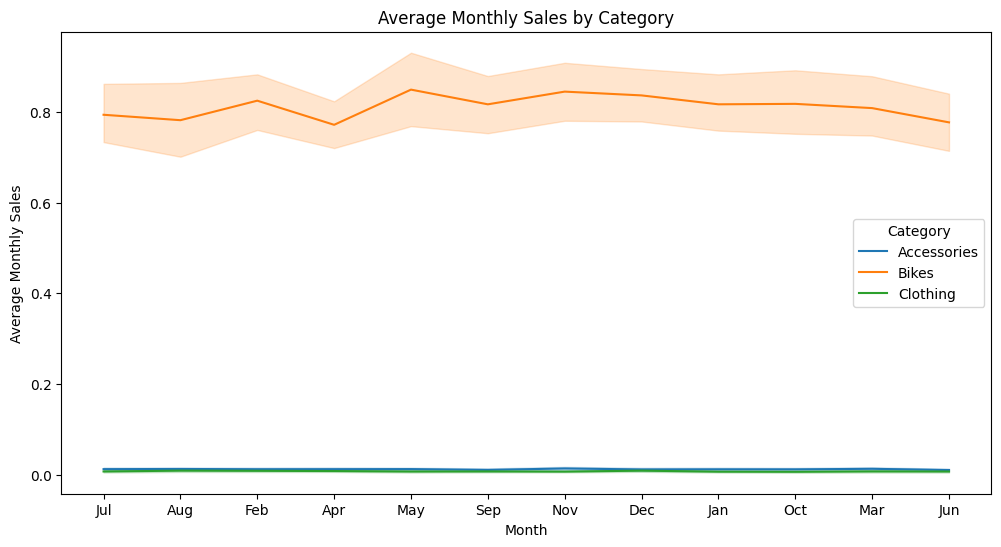

<ipython-input-8-62e144b34896>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_data, x='Subcategory', y='Sales_Variance', palette='coolwarm')


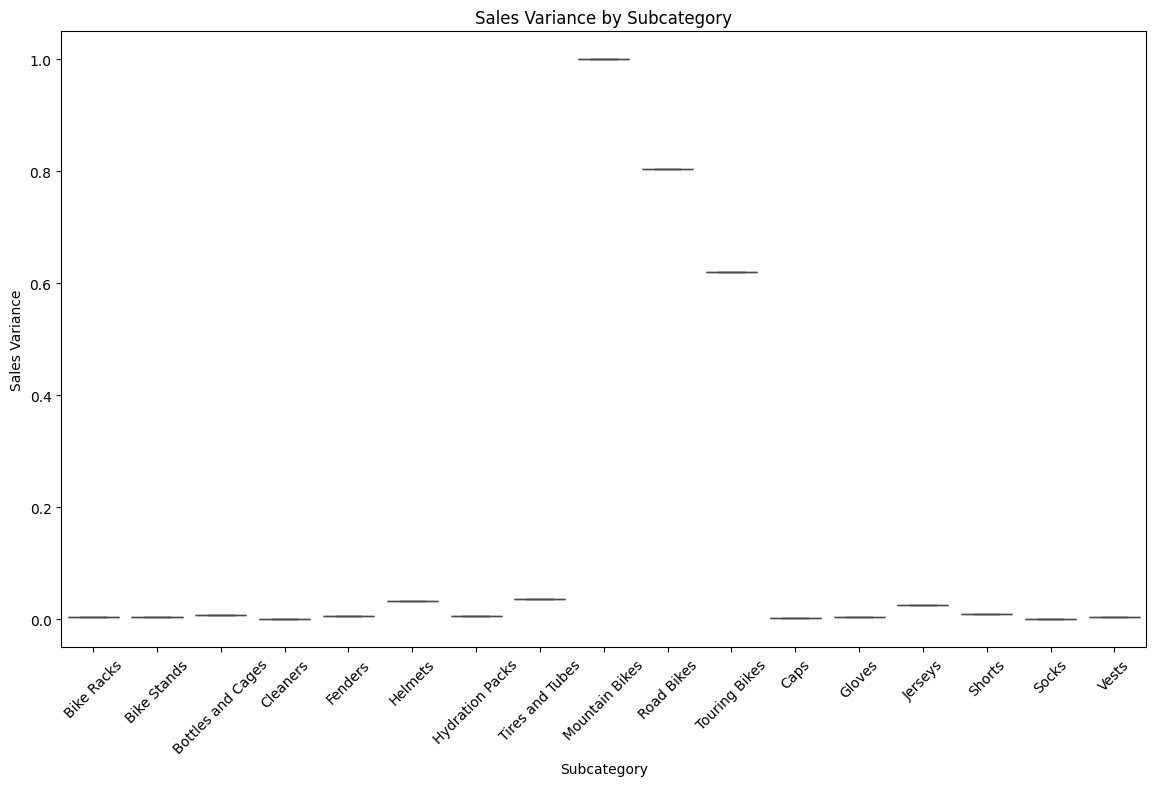

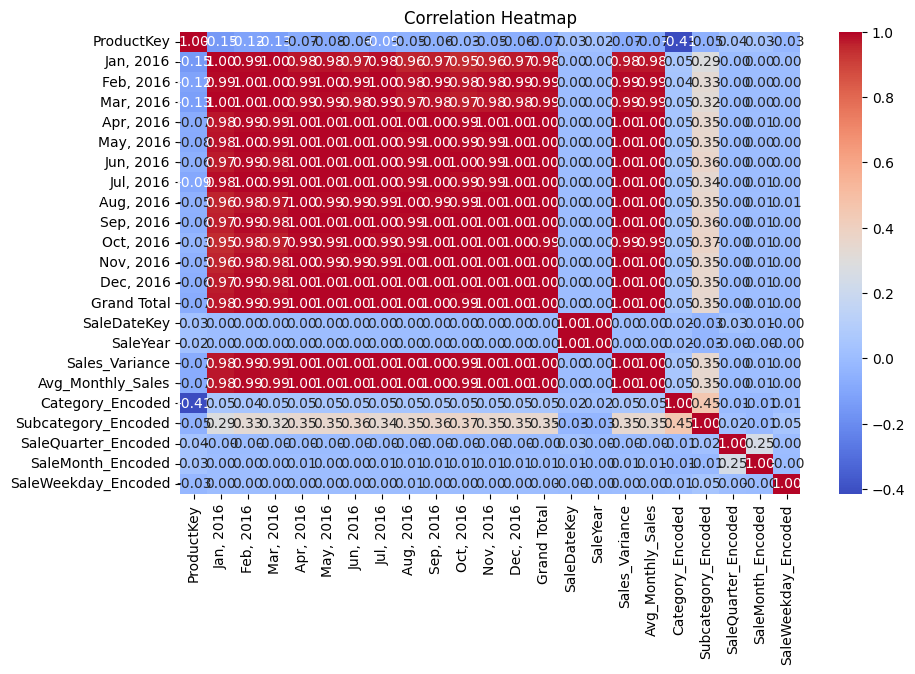

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Ploting line for average monthly sales by category
plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_data, x='SaleMonth', y='Avg_Monthly_Sales', hue='Category')
plt.title('Average Monthly Sales by Category')
plt.xlabel('Month')
plt.ylabel('Average Monthly Sales')
plt.legend(title='Category')
plt.show()

# Boxplot for sales variance by subcategory
plt.figure(figsize=(14, 8))
sns.boxplot(data=merged_data, x='Subcategory', y='Sales_Variance', palette='coolwarm')
plt.title('Sales Variance by Subcategory')
plt.xticks(rotation=45)
plt.xlabel('Subcategory')
plt.ylabel('Sales Variance')
plt.show()

# Heatmap for correlation among numerical features
plt.figure(figsize=(10, 6))

# Selecting only numeric columns for correlation calculation
numeric_cols = merged_data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = merged_data[numeric_cols].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()



In [ ]:
# Machine Learning Model: Predicting Sales Variance
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Features and target variable
X = merged_data[['Avg_Monthly_Sales', 'Category_Encoded', 'Subcategory_Encoded',
                 'SaleQuarter_Encoded', 'SaleMonth_Encoded', 'SaleWeekday_Encoded']]
y = merged_data['Sales_Variance']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 6.283389166564524e-32
R-squared: 1.0


In [ ]:
!npm install react recharts lucide-react


⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏
added 46 packages in 14s
⠏

In [ ]:
import plotly.express as px
import pandas as pd

# Sample data
data = {
    "Month": ["Jan", "Feb", "Mar", "Apr", "May", "Jun"],
    "Sales": [1131, 2635, 4134, 2179, 2637, 3279],
    "Budget": [14499, 52447, 54596, 54428, 55734, 69521],
}
df = pd.DataFrame(data)

# Line chart
fig = px.line(df, x="Month", y=["Sales", "Budget"], title="Sales vs Budget Trend")
fig.show()
